In [1]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
img = cv2.imread('./OpenCV_data/00myson.jpg');

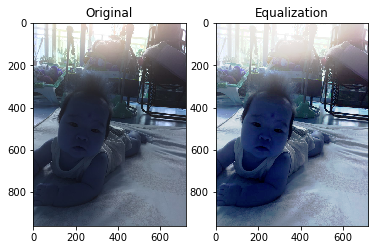

In [3]:
hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

In [4]:
img = cv2.imread('./OpenCV_data/00myson.jpg',0);

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(360,480))
img2 = cv2.resize(img2,(360,480))

img3 = img2-img

In [5]:
dst = np.hstack((img, img2, img3))
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 이미지 Blending
이미지를 서로 합칠 때 가중치를 두어 합치는 방법입니다.

g(x)=(1−α)f0(x)+αf1(x)

g(x)=(1−α)f0(x)+αf1(x)

a 값이 0 -> 1로 변함에 따라서 이미지가 전환된다.

아래 예제는 trackbar의 값을 조정함에 따라서 이미지가 변환되는 예제입니다.

In [34]:
def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('W', 'image', 0, 100, nothing)

while True:

    w = cv2.getTrackbarPos('W','image')

    dst = cv2.addWeighted(img,float(100-w) * 0.01, img2,float(w) * 0.01,0)

    cv2.imshow('dst', dst)

    if cv2.waitKey(1) &0xFF == 27:
        break;

cv2.destroyAllWindows()